<a href="https://colab.research.google.com/github/afairley/ColaboratoryNotebooks/blob/main/PiecwiseLinearFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" Translate this matlab code into matplotlib
% Draw a piewise-linear function in two dimensions on a given triangulation.
% Due to a bug in plot2svg, it can't export 3D pictures well.
% Then, I have to take the 3D picture, and rotate and project it manually to 2D.
% That makes the code more complicated.

function main()

%  read the triangulation from the data at the end of the code
   dummy_arg = 0;
   node=get_nodes(dummy_arg);      [np, k]=size(node);
   ele=get_triangles(dummy_arg);   [nt, k]=size(ele);

   % the function whose piecewise-linear approximation will be graphed
   f=inline('0.07*(22-8*x^2-10*y^2)+0.14');

   % will keep here the triangles to plot and their colors
   P  = zeros(3*nt, 3);
   C  = zeros(nt, 3);

   % iterate through triangles, save the coordinates of all the triangles
   alpha=0.3;
   for i=1:nt;
      u=ele(i,2); v=ele(i, 3); w=ele(i, 4);
      y1=node(u, 2); x1=node(u, 3); f1=f(x1, y1);
      y2=node(v, 2); x2=node(v, 3); f2=f(x2, y2);
      y3=node(w, 2); x3=node(w, 3); f3=f(x3, y3);

      % the color of the given triangle is chosen randomly
      color = alpha*rand(1, 3)+(1-alpha)*[1 1 1];

      % store the triangle and its color for the future
      m = 3*i - 2;
      P(m+0, 1) = x1; P(m+0, 2) = y1; P(m+0, 3) = f1;
      P(m+1, 1) = x2; P(m+1, 2) = y2; P(m+1, 3) = f2;
      P(m+2, 1) = x3; P(m+2, 2) = y3; P(m+2, 3) = f3;

      C(i, :) = color;
   end

% the "base", the domain of the piecewise linear function
   P0 = P; P0(:, 3) = 0*P0(:, 3);

%  Do a rotation in 3D, then plot the projections onto the xy-plane.
%  This has to be done by hand since plot2svg has trouble saving 3D graphics
   a = pi/2.5; b = 0; c = 0;
   Q = do_rotate(P, a, b, c);
   Q0 = do_rotate(P0, a, b, c);

   % sort the triangles by the third coordinate of the center of gravity (after the rotation)
   R = zeros(nt, 2);
   for i=1:nt
      m = 3*i-2;
      z1=Q(m, 3);
      z2=Q(m+1, 3);
      z3=Q(m+2, 3);

      R(i, 1) = (z1+z2+z3)/3;
      R(i, 2) = i;
   end
   R = sortrows(R, 1);

   % plot the projection of the rotated figure and the base shape
   clf; hold on; axis equal; axis off;
   lw = 0.5; black = [0, 0, 0]; white = [1, 1, 1];
   for i = 1:nt

      j = R(i, 2);
      m = 3*j-2;
      fill([Q(m, 1), Q(m+1, 1) Q(m+2, 1)], [Q(m, 2), Q(m+1, 2) Q(m+2, 2)], C(i, :));

      fill([Q0(m, 1), Q0(m+1, 1) Q0(m+2, 1)], [Q0(m, 2), Q0(m+1, 2) Q0(m+2, 2)], white);

      plot([Q(m, 1), Q(m+1, 1) Q(m+2, 1), Q(m, 1)], [Q(m, 2), Q(m+1, 2) Q(m+2, 2), Q(m, 2)], ...
	   'linewidth', lw, 'color', black);

      plot([Q0(m, 1), Q0(m+1, 1) Q0(m+2, 1), Q0(m, 1)], [Q0(m, 2), Q0(m+1, 2) Q0(m+2, 2), Q0(m, 2)], ...
	   'linewidth', lw, 'color', black);
   end

   % a small fix to avoid a bug with the bounding box when exporting
   small = 0.1;
   Sx = min(min(Q(:, 1)), min(Q0(:, 1)))-small;    Lx = max(max(Q(:, 1)), max(Q0(:, 1)))+small;
   Sy = min(min(Q(:, 2)), min(Q0(:, 2)))-small;    Ly = max(max(Q(:, 2)), max(Q0(:, 2)))+small;
   plot(Lx, Ly, '*', 'color', 0.99*white);
   plot(Sx, Sy, '*', 'color', 0.99*white);
   axis([Sx-small Lx+small, Sy-small, Ly+small])

%  export as eps and svg
%  saveas(gcf, 'piecewise_linear2D_proj.eps', 'psc2')
   plot2svg('piecewise_linear2D_proj.svg')

function node = get_nodes (dummy_arg)

   node =[1 1 0
2 0.913545 0.406737
3 0.669131 0.743145
4 0.309017 0.951057
5 -0.104528 0.994522
6 -0.5 0.866025
7 -0.809017 0.587785
8 -0.978148 0.207912
9 -0.978148 -0.207912
10 -0.809017 -0.587785
11 -0.5 -0.866025
12 -0.104528 -0.994522
13 0.309017 -0.951057
14 0.669131 -0.743145
15 0.913545 -0.406737
16 -0.161265 -0.179103
17 0.313878 0.228046
18 -0.314083 0.348825
19 0.40037 -0.290886
20 0.0609951 -0.58033
21 0.0617879 0.587873
22 -0.587046 1.34875e-16];


function ele = get_triangles(dummy_arg)

   ele=[1 10 11 16
2 16 18 22
3 10 22 9
4 10 16 22
5 11 12 20
6 7 22 18
7 21 3 4
8 8 9 22
9 8 22 7
10 1 19 15
11 20 13 14
12 6 18 21
13 6 21 5
14 19 1 17
15 19 16 20
16 11 20 16
17 2 17 1
18 16 17 18
19 6 7 18
20 17 16 19
21 21 4 5
22 3 17 2
23 17 3 21
24 20 12 13
25 19 20 14
26 18 17 21
27 14 15 19];

function Q = do_rotate(P, a, b, c)

   M = [1, 0, 0; 0, cos(a), sin(a); 0 -sin(a), cos(a)]*[cos(b), 0, -sin(b); 0, 1, 0; sin(b), 0, cos(b)]...
       *[cos(c), sin(c), 0; -sin(c), cos(c), 0; 0, 0, 1];

   [m, n] = size(P);

   Q = 0*P;

   for i=1:m

      X = P(i, :)';
      X = M*X;

      Q(i, 1) = X(1);
      Q(i, 2) = X(2);
      Q(i, 3) = X(3);
   end
"""

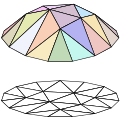